In [1]:
from frumkin.electrolyte import LatticeElectrolyte, Ion, Water
from frumkin.gongadze_iglic import GongadzeIglic
import numpy as np

potential = np.linspace(-1, 1, 200)
concentrations = [1e-3, 1e-2, 1e-1, 5e-1]
results = []

def get_model(conc):
    el = LatticeElectrolyte([
        Water(),
        Ion(r"Na$^+$", 6, conc, +1),
        Ion(r"Cl$^-$", 2, conc, -1),
    ])

    return GongadzeIglic(el, ohp=2.8) #, eps_stern=10)

for conc in concentrations:
    model = get_model(conc)
    result = model.voltammetry(potential, tol=1e-5)
    results.append(result)


Sweep from -3.89e+01 to 3.89e+01, starting at 0.00e+00. Maximum relative residual: 8.941e-07.
Sweep from -3.89e+01 to 3.89e+01, starting at 0.00e+00. Maximum relative residual: 9.846e-07.
Sweep from -3.89e+01 to 3.89e+01, starting at 0.00e+00. Maximum relative residual: 1.076e-06.
Sweep from -3.89e+01 to 3.89e+01, starting at 0.00e+00. Maximum relative residual: 1.144e-06.


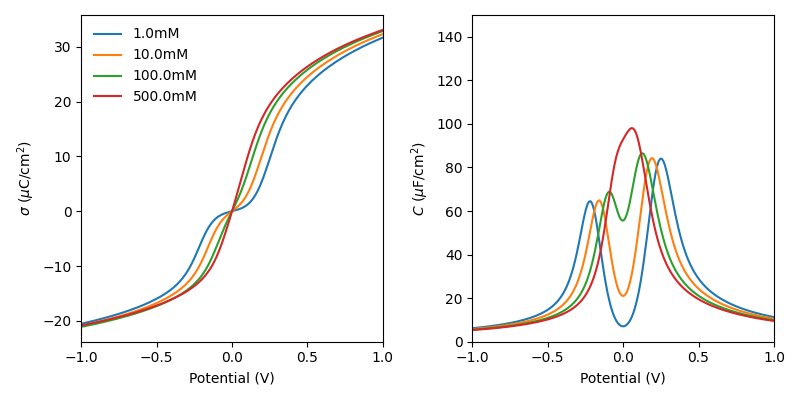

In [2]:
import matplotlib.pyplot as plt
%matplotlib widget

fig = None

for conc, result in zip(concentrations, results):
    fig = result.plot(fig=fig, legend=0, label=f"{conc*1e3:.1f}mM")

fig.axes[1].set_ylim([0, 150])
fig.axes[0].legend(frameon=False)
plt.show()

In [3]:
profiles = []
potential = -1

for conc in concentrations:
    model = get_model(conc)
    prf = model.single_point(potential, tol=1e-5)
    profiles.append(prf)

Sweep from 0.00e+00 to -3.89e+01, starting at 0.00e+00. Maximum relative residual: 8.941e-07.
Sweep from 0.00e+00 to -3.89e+01, starting at 0.00e+00. Maximum relative residual: 9.846e-07.
Sweep from 0.00e+00 to -3.89e+01, starting at 0.00e+00. Maximum relative residual: 1.076e-06.
Sweep from 0.00e+00 to -3.89e+01, starting at 0.00e+00. Maximum relative residual: 1.144e-06.


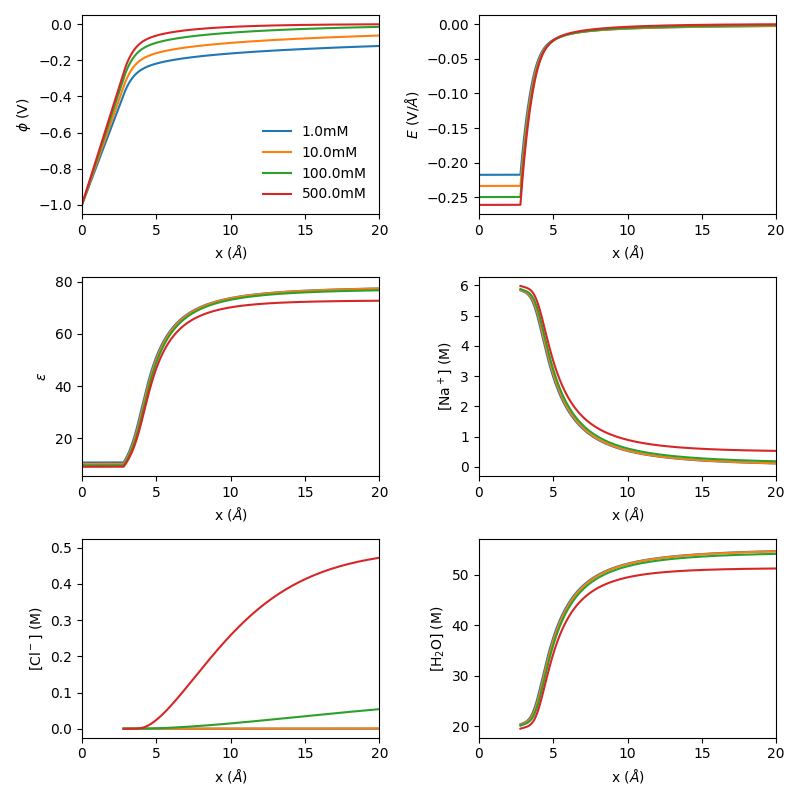

In [4]:
fig = None

for conc, prf in zip(concentrations, profiles):
    fig = prf.plot(fig=fig, x_max=20, legend=0, label=f"{conc*1e3:.1f}mM")

fig.axes[0].legend(frameon=False)
plt.show()